<a href="https://colab.research.google.com/github/Suchitra-V31/Machine-learning-projects/blob/main/Iris_Flower_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris Flower Dataset**



The Iris flower data set is a multivariate data set which consists of variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.



Let us import all the necessary libraries.

In [60]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data**

In [61]:
iris=pd.read_csv('/content/IRIS.csv')

In [62]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
iris.shape

(150, 5)

In [64]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [65]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Let us visualize the dataset**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


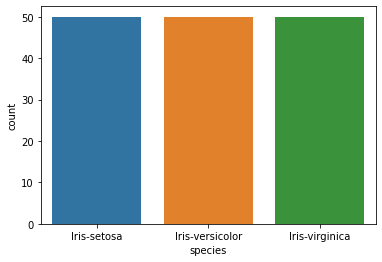

In [66]:
sns.countplot(iris['species'])

Let us find the correlation between the data

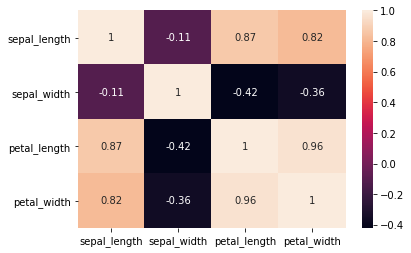

In [67]:
sns.heatmap(iris.corr(),annot=True)

From this we could see that petal_length ,petal_width,sepal_length,sepal_width are correlated with each other.Let us visualize and see how they are correlated.

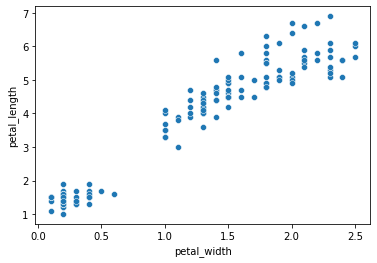

In [68]:
sns.scatterplot(x=iris['petal_width'],y=iris['petal_length'])

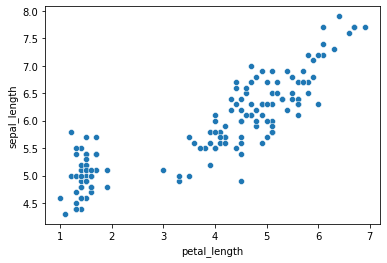

In [69]:
sns.scatterplot(x=iris['petal_length'],y=iris['sepal_length'])

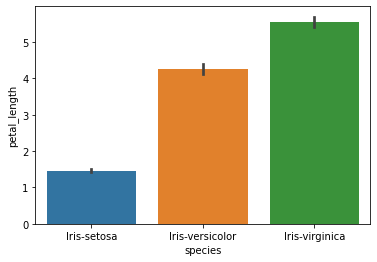

In [70]:
sns.barplot(x=iris['species'],y=iris['petal_length'])

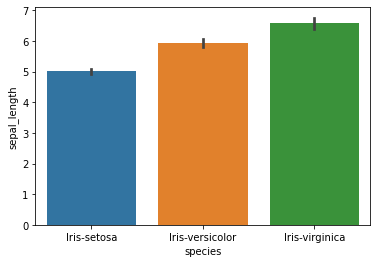

In [71]:
sns.barplot(x=iris['species'],y=iris['sepal_length'])

From both of the plots above we could see that virginica flowers has long petal and sepal length.

In [72]:
iris['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [73]:
pd.get_dummies(iris['species'])

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [74]:
iris['species']=pd.get_dummies(iris['species'],drop_first=True)

In [75]:
X=iris.drop(['species'],axis=1)
y=iris['species']

Split the model into train/test.

In [76]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
from sklearn.linear_model import LogisticRegression

**Using Logistic Regression**


In [107]:
lr=LogisticRegression()

In [108]:
model=lr.fit(X_train,y_train)

In [109]:
pred=model.predict(X_test)

In [110]:
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.71      0.56      0.63         9

    accuracy                           0.80        30
   macro avg       0.77      0.73      0.74        30
weighted avg       0.79      0.80      0.79        30



We could see that our model has predicted with 80% accuraccy.